In [1]:
!pip install yfinance pandas_datareader


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import pandas_datareader as data

In [3]:
start='2010-01-01'
end='2019-12-31'

In [4]:
df=yf.download('AAPL', start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440332,6.455078,6.391279,6.422878,493729600
2010-01-05,6.451468,6.487881,6.417461,6.458088,601904800
2010-01-06,6.348847,6.477046,6.342227,6.451467,552160000
2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200
2010-01-08,6.379240,6.379842,6.291367,6.328682,447610800


In [6]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-23,68.757660,68.818186,67.878820,67.917557,98572000
2019-12-24,68.823029,68.973140,68.496193,68.924716,48478800
2019-12-26,70.188499,70.205449,68.927137,68.956189,93121200
2019-12-27,70.161858,71.171436,69.755124,70.481437,146266000
2019-12-30,70.578300,70.861566,69.053045,70.079566,144114400


In [7]:
df=df.reset_index()

In [8]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.440332,6.455078,6.391279,6.422878,493729600
1,2010-01-05,6.451468,6.487881,6.417461,6.458088,601904800
2,2010-01-06,6.348847,6.477046,6.342227,6.451467,552160000
3,2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200
4,2010-01-08,6.379240,6.379842,6.291367,6.328682,447610800


In [ ]:
df=df.drop(['Date'], axis=1)


In [16]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440332,6.455078,6.391279,6.422878,493729600
1,6.451468,6.487881,6.417461,6.458088,601904800
2,6.348847,6.477046,6.342227,6.451467,552160000
3,6.337109,6.379843,6.291066,6.372319,477131200
4,6.379240,6.379842,6.291367,6.328682,447610800


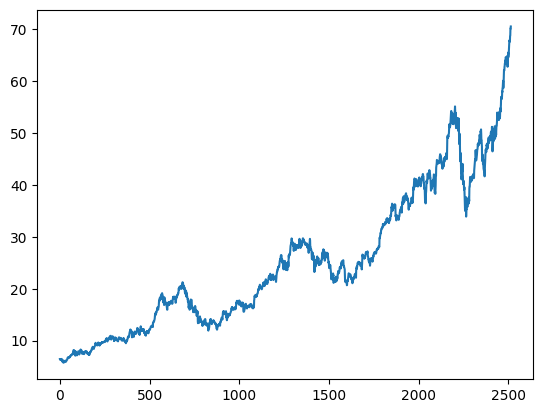

In [17]:
plt.plot(df.Close)

In [18]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.212838
2511,57.410470
2512,57.647438
2513,57.875338


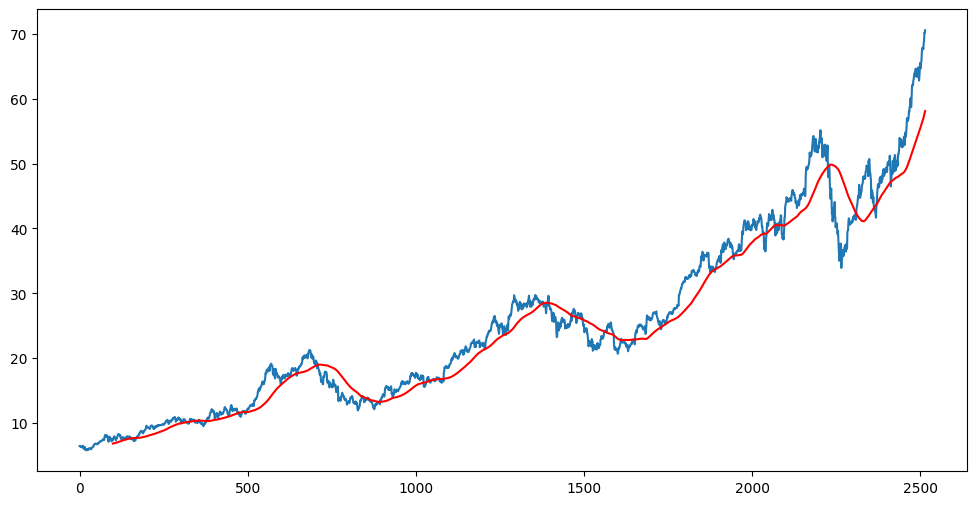

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [20]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,52.164465
2511,52.291901
2512,52.425207
2513,52.555959


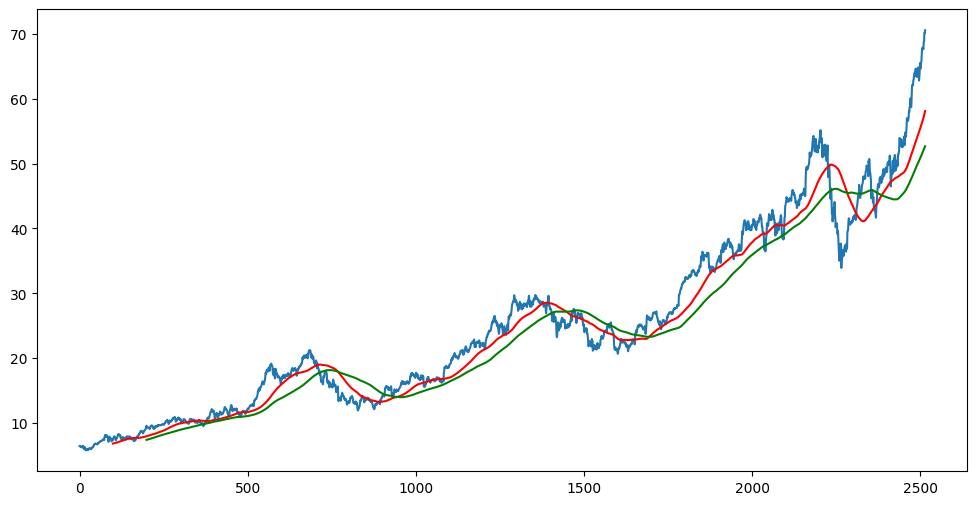

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [23]:
df.shape

(2515, 5)

In [24]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [25]:
data_training.head()

Ticker,AAPL
0,6.440332
1,6.451468
2,6.348847
3,6.337109
4,6.379240


In [26]:
data_testing.head()

Ticker,AAPL
1760,26.996567
1761,26.786102
1762,26.862427
1763,26.832355
1764,26.968813


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [28]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02760005],
       [0.02806511],
       [0.02377928],
       ...,
       [0.88408425],
       [0.89123194],
       [0.8864024 ]])

In [29]:
X_train=[]
Y_train=[]

In [30]:
for i in range(100, data_training_array.shape[0]):
  X_train.append(data_training_array[i-100:i])
  Y_train.append(data_training_array[i,0])

  x_train, y_train=np.array(X_train), np.array(Y_train)

In [31]:
x_train.shape

(1660, 100, 1)

In [32]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [33]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape= (x_train.shape[1],1)))

model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 273ms/step - loss: 0.1255
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 274ms/step - loss: 0.0115
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 271ms/step - loss: 0.0105
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 272ms/step - loss: 0.0077
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 281ms/step - loss: 0.0075
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 297ms/step - loss: 0.0082
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 274ms/step - loss: 0.0069
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - loss: 0.0071
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - loss: 0.0074
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 291ms/step - loss: 0.0055
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - loss: 0.0075
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - loss: 0.0051
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 292ms/step - loss: 0.0057
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 274ms/step - loss: 0.0055
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [36]:
model.save('my_model.keras')

In [54]:
model.save('keras_mode.h5')

In [37]:
data_testing.head()

Ticker,AAPL
1760,26.996567
1761,26.786102
1762,26.862427
1763,26.832355
1764,26.968813


In [38]:
data_training.tail(100)

Ticker,AAPL
1660,24.935101
1661,25.036339
1662,24.849962
1663,24.833857
1664,24.891376
...,...
1755,27.072882
1756,26.894802
1757,26.947998
1758,27.119143


In [39]:
past_100_days = data_training.tail(100)

In [40]:
final_data=pd.concat([past_100_days,data_testing], ignore_index=True)

In [41]:
final_data.head()

Ticker,AAPL
0,24.935101
1,25.036339
2,24.849962
3,24.833857
4,24.891376


In [42]:
input_Data=scaler.fit_transform(final_data)
input_Data

array([[0.02573565],
       [0.0278966 ],
       [0.02391835],
       [0.02357458],
       [0.02480235],
       [0.03118713],
       [0.03069593],
       [0.0299103 ],
       [0.02922266],
       [0.03059786],
       [0.02642313],
       [0.02809296],
       [0.02406565],
       [0.0218065 ],
       [0.01871221],
       [0.01812293],
       [0.01409558],
       [0.01458682],
       [0.01768091],
       [0.02259222],
       [0.02244496],
       [0.02568627],
       [0.01173798],
       [0.        ],
       [0.01134519],
       [0.02367269],
       [0.04243428],
       [0.06109743],
       [0.05790502],
       [0.05132388],
       [0.05127454],
       [0.0511765 ],
       [0.05643158],
       [0.04705083],
       [0.04788577],
       [0.04891718],
       [0.05314089],
       [0.04444782],
       [0.04872083],
       [0.04611777],
       [0.04847521],
       [0.04872083],
       [0.05284617],
       [0.05368123],
       [0.06345486],
       [0.0646826 ],
       [0.06979059],
       [0.068

In [43]:
x_test=[]
y_test=[]

for i in range(100, input_Data.shape[0]):
  x_test.append(input_Data[i-100:i])
  y_test.append(input_Data[i,0])

In [45]:
x_test, y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [46]:
y_predict=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step


In [47]:
y_predict.shape

(755, 1)

In [48]:
y_test

array([0.06973811, 0.0652457 , 0.06687486, 0.06623298, 0.0691457 ,
       0.07556325, 0.08089476, 0.08148713, 0.08464656, 0.08217839,
       0.0811416 , 0.08588073, 0.08583134, 0.08479463, 0.08588073,
       0.08627552, 0.08573258, 0.09516145, 0.09545764, 0.0955069 ,
       0.09392724, 0.09254509, 0.12907585, 0.12798976, 0.13070498,
       0.13667815, 0.14279956, 0.14531712, 0.1500273 , 0.14853978,
       0.15434058, 0.16291823, 0.16534728, 0.16455411, 0.16638855,
       0.17124766, 0.17328029, 0.17040462, 0.17104919, 0.17238782,
       0.17268523, 0.18656768, 0.18245243, 0.18651825, 0.18433662,
       0.18522912, 0.18265087, 0.18106404, 0.18334518, 0.18364238,
       0.1826012 , 0.18988952, 0.19102988, 0.18755936, 0.19484744,
       0.18681562, 0.19464925, 0.19217033, 0.19078202, 0.19197214,
       0.20644895, 0.20803586, 0.20709368, 0.20575496, 0.2059534 ,
       0.21125836, 0.20753998, 0.20575496, 0.20416855, 0.20332539,
       0.19569044, 0.19653327, 0.19281449, 0.19668188, 0.19355

In [49]:
y_predict

array([[0.10534829],
       [0.10609107],
       [0.1068134 ],
       [0.10749839],
       [0.10813308],
       [0.1087091 ],
       [0.10922736],
       [0.1096997 ],
       [0.11014313],
       [0.11057475],
       [0.11100709],
       [0.11144264],
       [0.11188415],
       [0.11233655],
       [0.11279944],
       [0.11326936],
       [0.11374259],
       [0.11421348],
       [0.11468917],
       [0.11518776],
       [0.11572157],
       [0.11629266],
       [0.11689205],
       [0.11756581],
       [0.11840038],
       [0.11946245],
       [0.1208007 ],
       [0.12244999],
       [0.12442517],
       [0.12672326],
       [0.12931691],
       [0.13216117],
       [0.13521278],
       [0.13845271],
       [0.14184505],
       [0.14534476],
       [0.14891471],
       [0.15252744],
       [0.15615138],
       [0.15974715],
       [0.16327654],
       [0.16674006],
       [0.17014198],
       [0.17348368],
       [0.17677158],
       [0.17999682],
       [0.18314339],
       [0.186

In [50]:
scaler.scale_

array([0.02134522])

In [51]:
scale_factor=1/0.02134522
y_predict=y_predict*scale_factor
y_test=y_test*scale_factor

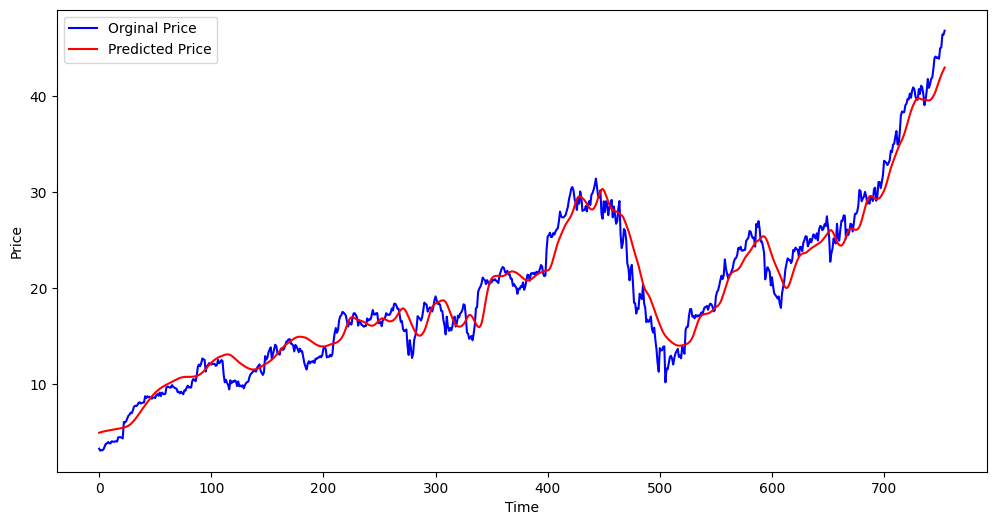

In [53]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Orginal Price')
plt.plot(y_predict, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()